# Videos

Frame ~690 in výška závaží = frame 0 in páka
The end of movement in výška závaží is around frame 1720 (roughly accurate with the frame length of 1097 for páka)

## Páka

1cm ~ 80px
Starts at 9,1cm
Straight point ~ 2,5cm - 3cm ?
Lowest point ~ 0,1cm

## Výška závaží

1cm ~ 56px
highest point ~ 5,3cm

# Values

The bag's dimensions are 23 x 13 x 2,5 cm^3 (approximated as a rectangular prism)
    - When pushed down along its length with the plank

The plank's dimension are 70 x 10 x 1,7 cm^3
    - The width of the plank is a bit less than half the length of the bag, ideal, so that it minimally affects the second object
    - The calculated area of the plank as a piston is: 9,8 x 13 cm^2 = 0,1274

Measuring the area of the ball as a piston:
    - S = $\frac{dV}{dy}$
    - We can also calculate S by calculating the difference in x and y (height of the objects), where one of the objects is the wooden plank, whose piston area is known and by expecting a constant volume (the air inside wasn't compressed at all)
    - The pivot point of the plank was at 0cm, on a marker with a diameter of 1,8cm (probably worth a re-measure)
    - The force of the plank on the bag was at 30cm from the pivot point (so the section from $\langle 23,5; 36,5 \rangle $)
    - The area where we measured the height of the plank was about 60cm from its pivot point (probably worth a re-measure)


$dV = dx * S1 + dy*S2$\
$S2 = \frac{dV - dx}{dy}S1$\
A protože počítáme s $dV = 0$\
$S2 = \frac{-dx}{dy}S1$


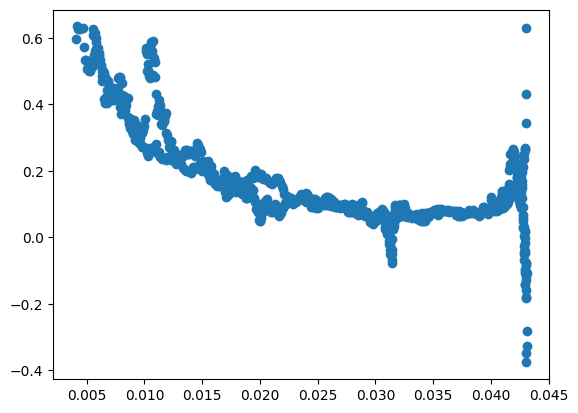

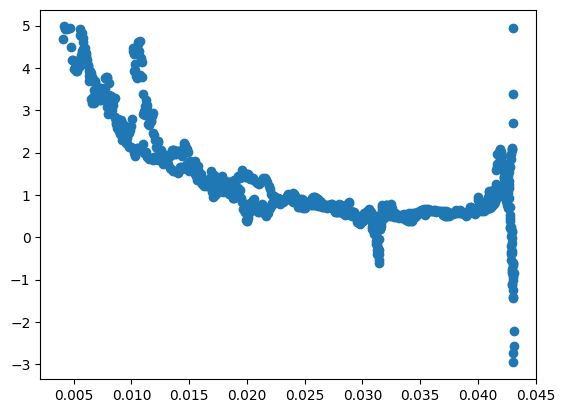

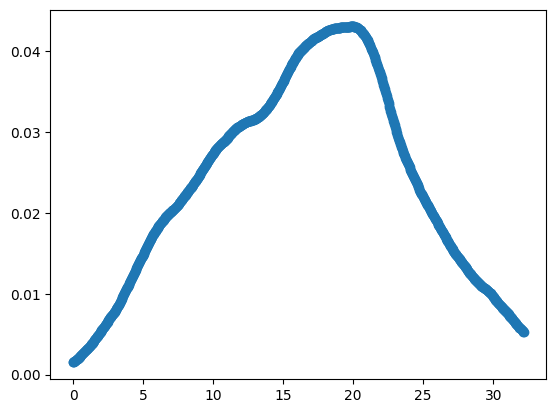

In [102]:
# V+(x-oldX)*S1(x) + (y-oldY)*S2(y)

import numpy as np
import matplotlib.pyplot as plt

input_paths = [
    "páka",
    "výška závaží",
]

lmap = lambda f,x : list(map(f, x))

tdata = []
xdata = []
ydata = []

with open("páka.csv", "r+") as read:
    data = read.readlines()[1:]
    data = lmap(lambda row: row.rstrip().split(","), data)

    tdata = lmap(lambda row: float(row[0]), data)
    xdata = lmap(lambda row: float(row[2])/8000, data)
    minX = min(xdata)
    xdata = lmap(lambda x: x-minX, xdata)

with open("výška závaží.csv", "r+") as read:
    data = read.readlines()[1:]
    data = lmap(lambda row: row.rstrip().split(","), data)

    temp = lmap(lambda row: float(row[0]), data)
    if (len(temp) < len(tdata)): tdata = temp
    ydata = lmap(lambda row: float(row[2])/5600, data)
    minY = min(ydata)
    ydata = lmap(lambda y: y-minY, ydata)
    
        
xdata = xdata[:len(tdata)]
ydata = ydata[:len(tdata)]

smoothAmount = 75
v = np.ones(smoothAmount)/smoothAmount
flAvgXdata = np.convolve(xdata, v, "valid")
flAvgYdata = np.convolve(ydata, v, "valid")

tdata = tdata[:len(flAvgYdata)]


dx = 0
dy = 0
S1 = 0.1274 # m^2

S2Times = []
S2Values = []
S2yValues = []
other = []

for i in range(1, len(tdata)):
    dx = flAvgXdata[i] - flAvgXdata[i-1]
    dy = flAvgYdata[i] - flAvgYdata[i-1]
    if (dy == 0): continue
    S2 = -dx/dy*S1
    # S2Values.append(S2)
    # S2Times.append(tdata[i])
    # S2yValues.append(flAvgYdata[i])
    # other.append(dx/dy)
    if (abs(S2) < 5*S1):
        S2Values.append(S2)
        S2Times.append(tdata[i])
        S2yValues.append(flAvgYdata[i])
        other.append(-dx/dy)

plt.scatter(S2yValues, S2Values)
plt.show()

plt.scatter(S2yValues, other)
plt.show()

plt.scatter(tdata, flAvgYdata)
plt.show()